In [1]:
#based on chap6

In [2]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from datetime import datetime

In [6]:
dax = web.DataReader(name = 'DAX',data_source='iex',start = '2014-11-1')


5y


In [7]:
dax.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 2014-11-03 to 2018-10-05
Data columns (total 5 columns):
open      964 non-null float64
high      964 non-null float64
low       964 non-null float64
close     980 non-null float64
volume    980 non-null int64
dtypes: float64(4), int64(1)
memory usage: 45.9+ KB


In [8]:
dax.head()

,open,high,low,close,volume
date,,,,,
2014-11-03,24.4960,24.4960,24.4960,24.4960,213
2014-11-04,23.9788,23.9788,23.9788,23.9788,2500
2014-11-05,24.1104,24.1104,24.1104,24.1104,300
2014-11-06,24.0352,24.0352,24.0352,24.0352,153
2014-11-07,23.9411,23.9411,23.9411,23.9411,100


In [9]:
dax.tail()

,open,high,low,close,volume
date,,,,,
2018-10-01,28.65,28.65,28.5048,28.5048,2679
2018-10-02,28.16,28.37,28.1600,28.3700,2165
2018-10-03,28.50,28.54,28.4600,28.5400,1442
2018-10-04,28.30,28.39,28.0100,28.1850,3289
2018-10-05,27.74,27.76,27.7400,27.7600,480


In [10]:
dax['close'].plot(figsize=(8,5))

In [11]:
# add new column which contains log returns

In [12]:
%%time
dax['ret_loop']=0.0

CPU times: user 35.8 ms, sys: 0 ns, total: 35.8 ms
Wall time: 35.8 ms


In [13]:
%%time
for i in range(1,len(dax)):
    dax['ret_loop'][i]=np.log(dax['close'][i]/dax['close'][i-1])

/home/cassandra/Shikha/pythonvirtual/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


CPU times: user 28.1 s, sys: 42.8 ms, total: 28.2 s
Wall time: 28.2 s


In [14]:
dax[['close','ret_loop']].tail()

,close,ret_loop
date,,
2018-10-01,28.5048,0.000519
2018-10-02,28.3700,-0.004740
2018-10-03,28.5400,0.005974
2018-10-04,28.1850,-0.012517
2018-10-05,27.7600,-0.015194


In [15]:
%%time
dax['return'] = np.log(dax['close']/dax['close'].shift(1))

CPU times: user 5.78 ms, sys: 0 ns, total: 5.78 ms
Wall time: 5.13 ms


In [16]:
dax[['close','ret_loop','return']].tail()

,close,ret_loop,return
date,,,
2018-10-01,28.5048,0.000519,0.000519
2018-10-02,28.3700,-0.004740,-0.004740
2018-10-03,28.5400,0.005974,0.005974
2018-10-04,28.1850,-0.012517,-0.012517
2018-10-05,27.7600,-0.015194,-0.015194


In [17]:
del dax['ret_loop']

In [18]:
#volatility clustering : volatility is not constant over time .
#there are periods of high/low  volatility

#leverage effect : generally, market returns and volatility negatively correlated

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1b289f8d0>,
      dtype=object)

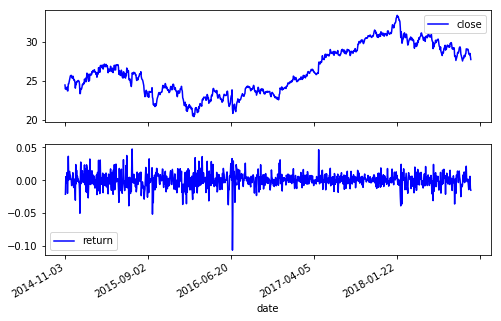

In [19]:
dax[['close','return']].plot(subplots=True , style='b',figsize=(8,5))

In [20]:
#Volatility : important for options traders
#trends / moving averages : important for stock traders

In [21]:
#CHANGE : not using rolling_mean because deprecated 
dax['42d'] = pd.Series.rolling(dax['close'],window=42).mean()
dax['252d'] = pd.Series.rolling(dax['close'],window=252).mean()

In [22]:
dax[['close','42d','252d']].tail()

,close,42d,252d
date,,,
2018-10-01,28.5048,28.569457,30.251535
2018-10-02,28.3700,28.550886,30.243444
2018-10-03,28.5400,28.535171,30.235678
2018-10-04,28.1850,28.513788,30.226304
2018-10-05,27.7600,28.477598,30.215548


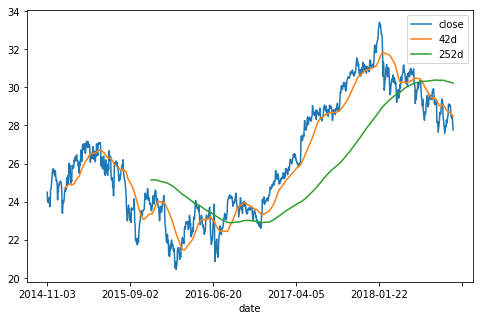

In [23]:
dax[['close','42d','252d']].plot(figsize=(8,5))

In [24]:
#for options trader , moving historical volatility 
#(moving historical standard deviation of log returns) is important

In [25]:
import math

In [28]:
dax['Mov_Vol'] = pd.Series.rolling(dax['return'],window=252).std()*math.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1b0221710>,
      dtype=object)

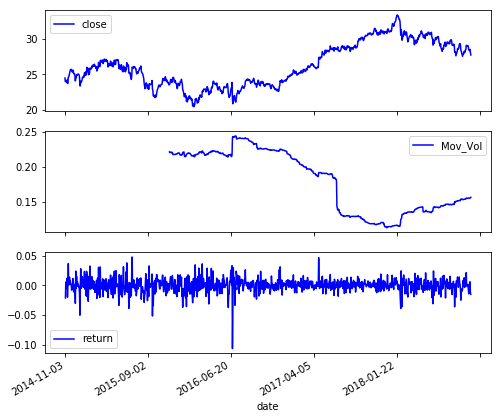

In [29]:
dax[['close','Mov_Vol','return']].plot(subplots=True,style='b',figsize=(8,7))